# Life Expectancy Veri Setinin Modellenmesi¶
Bu çalışmada, ülkelerdeki birçok faktörün yaşam beklentisi üzerinde etkisi incelenecektir. Bunun için seçilen değerlendirme metrikleri ortalama karesel hata (MSE), ortalama mutlak hata (MAE) ve R2 puanı kullanılarak uygun regresyonlarla modellemeler yapılacaktır.

# 1. Problemin Tanımı

Bu veri seti gözlemleri 193 farklı ülkenin (Gelişmiş ve Gelişmekte olan) 2000-2015 yılları içerisinde belirlenen gelir düzeyi, okuma oranı, HIV/AIDS, HepatitB, Alkol kullanımı gibi etkenler üzerinden ortalama yaşam süresi beklentisini gözlemlemektir.


# 2. Data

Bu veri seti 22 Sütun ve 2938 satırdan oluşurmaktadır.Bağımsız değişken sayımız 20 adettir. Geniş kategoride; aşılamayla ilgili faktörler, Ölüm faktörleri, Ekonomik faktörler ve Sosyal faktörler gibi faktörler ele alınmıştır.

Bu veri setine  https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who ulaşıldı.

Country: Ülke
Year   :Yıl
Status :Developed(Gelişmiş) ve Developing(Gelişmekte Olan)

Life expectancy : Yaş olarak yaşam beklentisi

Adult Mortality :15-60 yaş arası her iki cinsin ölüm oranı

infant deaths   :1000 kişi başına bebek ölümü sayısı

Alcohol:15 yaş üzeri alkol tüketimi (litre bazında)

percentage expenditure: kişi başına yapılan sağlık harcamaların gayri safi yurtiçi hasılaya oranı

Hepatitis B : 1 yaş HepatitB aşılama oranı

Measles : 1000 kişi başına bildirilen kızamık vaka sayısı

BMI : tüm nüfusun ortalama vücut kitle indeksi

under-five deaths : her 1000 kişi başına beş yaş altı ölüm sayısı

Polio : 1 yaş çocuk felci aşısı (Pol3) kapsamı

Total expenditure : sağlık harcamalarının toplam ülke içi harcamalarına oranı

Diphtheria : 1 yaşındaki çocuklarda difteri tetanoz toksoidi ve boğmaca (DTP3) aşılama oranı

HIV/AIDS : 0-4 yaş arası 1.000 canlı doğum başına ölüm( HIV/AIDS)

GDP : Kişi başına düşen Gayri Safi Yurtiçi Hasıla (USD bazında)

Population : Ülkelerin nüfusları

thinness 1-19 years : 10-19 Yaş arası zayıflık oranı

thinness 5-9 years : 5-9 Yaş arası zayıflık oranı

Income composition of resources : Kaynakların gelir bileşimi açısından insani Gelişme Endeksi

Schooling : yıl içinde okullaşma sayısı

# 3.Değerlendirme

Bu veri setinde MAE, MSE ve R2 score değerlendirme ölçütleri kullanıldı.

# 4.Features

Verileri içe aktararak başlanılacaktır.Verilerde eksik ve aykırı değerler olup olmadığını kontrol edilip, verimizdeki genel özellikleri anlamak için tanımlayıcı istatistikler kullanılacaktır.

# Gerekli Kütüphanelerin ve Data Setlerinin Yüklenmesi

In [1]:
#Kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data setinin yüklenmesi
df=pd.read_csv("Life Expectancy Data.csv")

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Veri Setinde 22  değişken bulunmaktadır. Veri setinin bağımlı değişkeni ise Life Expactancy sütunudur ve 20 bağımsız değişken mevcuttur.

# Verilerin Kontrol Edilmesi

In [4]:
#Veri kümesinin satır ve sütun sayısı
df.shape

(2938, 22)

In [5]:
#Her sütundaki benzersiz değerlerin tespiti
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [6]:
#Data setinin sütunların isimleri
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Sütun adlarının önünde ve/veya sonunda bulunan boşlukları silme
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
#Data setinin ilk beş kolonu
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
#Sütunların veri tipleri
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [11]:
#Yinelenen satırların tespiti
df.duplicated().sum()

0

Veriler kontrol edildi ve yinelenen satırların olmadığı tespit edildi.

# Veri Temizleme

# 1) Eksik veriler

In [12]:
#Eksik Verilerin Tespit edilmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
#Toplamda eksik veri
df.isnull().sum().sum()

2563

In [15]:
#Eksik verilerin yüzdesel gösterimi
missing_percentage = df.isnull().mean()*100
missing_df = pd.DataFrame({'Column':df.columns, 'Missing_Percentage': missing_percentage}).reset_index(drop=True)

print(missing_df)

                             Column  Missing_Percentage
0                           Country            0.000000
1                              Year            0.000000
2                            Status            0.000000
3                   Life expectancy            0.340368
4                   Adult Mortality            0.340368
5                     infant deaths            0.000000
6                           Alcohol            6.603131
7            percentage expenditure            0.000000
8                       Hepatitis B           18.822328
9                           Measles            0.000000
10                              BMI            1.157250
11                under-five deaths            0.000000
12                            Polio            0.646698
13                Total expenditure            7.692308
14                       Diphtheria            0.646698
15                         HIV/AIDS            0.000000
16                              GDP           15

Eksik verilerin görselleştirilmesi

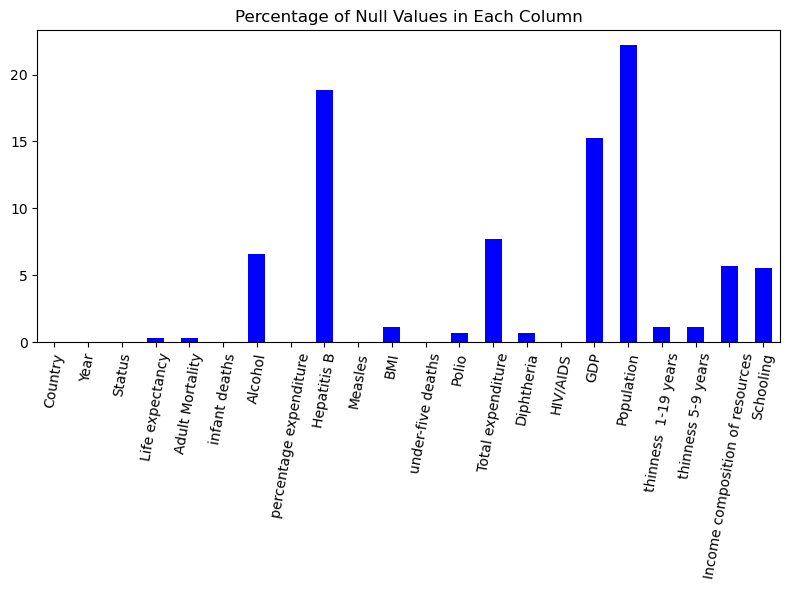

In [16]:
#Eksik verilerin yüzdesel gösterimi
plt.figure(figsize=(8,6))
missing_percentage.plot(kind='bar', color='blue')
plt.title('Percentage of Null Values in Each Column')

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

En fazla eksik değere sahip olan sütunlar: Hepatitis B,Population, GDP

In [17]:
#Eksik değerleri olan sütunlar
missing_values=df.isnull().sum()
columns_with_missing_values=list(missing_values[missing_values>0].index)
columns_with_missing_values

['Life expectancy',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

Eksik verilerimizin tesptini yaptıktan sonra artık eksik verilerimizi ortalama değerler ile dolduracağız.Veri setinin daha sağlıklı sonuç vermesi için eksik veriler kaldırılmamıştır.

In [18]:
#Eksik değerlerin mean ile doldurmak için
col_with_null_values =['Life expectancy',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']
for i in col_with_null_values:
    mean = df[i].mean()
    df[i].fillna(value=mean, inplace = True)

In [19]:
#Başka eksik değer var mı?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [20]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Tespit edilen eksik veriler mean ile dolduruldu. Veri setinde eksik veri kalmadı.

# 2) Aykırı Değerlerin Ele Alınması

In [21]:
from scipy import stats

In [22]:
#Sayısal sütunların belirlenmesi
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [23]:
#IQR(Interquartile Range)Yöntemi kullanarak Her bir sayısal sütun için aykırı değerlerin tespit edilmesi

def detect_outliers(df_column):
    q1 = df_column.quantile(0.25)
    q3 = df_column.quantile(0.75)
    Iqr = q3 - q1
    Upper_Limit = q3 + 1.5 * Iqr
    Lower_Limit = q1 - 1.5 * Iqr  
    outliers = df_column[(df_column < Lower_Limit) | (df_column > Upper_Limit)]
    return outliers.tolist()

IQR yönteminde verideki aykırı değerleri tespit etmek için birinci çeyrek (q1) ve üçüncü çeyrek (q3) arasındaki farkı (IQR) kullanır. Genellikle, bir değerin q1 - 1.5 * Iqr veya q3 + 1.5 * Iqr sınırlarının dışında olması, bu değerin aykırı olduğunu gösterir. 

In [24]:
#Aykırı değerlerin yüzdesel gösterimi
outlier_df = {}
for column in numerical_columns:
    outliers = detect_outliers(df[column])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(df[column]))*100
    outlier_df[column] = {'count':outlier_counts, 'percentage': outlier_percentages}
    
    print(column)
    print("No. of Iqr-based outliers:", outlier_counts)
    print("----------------------")

Year
No. of Iqr-based outliers: 0
----------------------
Life expectancy
No. of Iqr-based outliers: 17
----------------------
Adult Mortality
No. of Iqr-based outliers: 86
----------------------
infant deaths
No. of Iqr-based outliers: 315
----------------------
Alcohol
No. of Iqr-based outliers: 3
----------------------
percentage expenditure
No. of Iqr-based outliers: 389
----------------------
Hepatitis B
No. of Iqr-based outliers: 316
----------------------
Measles
No. of Iqr-based outliers: 542
----------------------
BMI
No. of Iqr-based outliers: 0
----------------------
under-five deaths
No. of Iqr-based outliers: 394
----------------------
Polio
No. of Iqr-based outliers: 279
----------------------
Total expenditure
No. of Iqr-based outliers: 51
----------------------
Diphtheria
No. of Iqr-based outliers: 298
----------------------
HIV/AIDS
No. of Iqr-based outliers: 542
----------------------
GDP
No. of Iqr-based outliers: 300
----------------------
Population
No. of Iqr-based

In [25]:
columns =list(outlier_df.keys())
counts = [v['count'] for v in outlier_df.values()]
percentages = [v['percentage'] for v in outlier_df.values()]

print(percentages)

[0.0, 0.5786249149081008, 2.9271613342409806, 10.721579305650101, 0.10211027910142954, 13.240299523485364, 10.755616065350578, 18.447923757658273, 0.0, 13.410483321987746, 9.496255956432947, 1.7358747447243021, 10.142954390742002, 18.447923757658273, 10.211027910142954, 6.603131381892443, 3.4036759700476518, 3.369639210347175, 4.424778761061947, 2.6208304969366916]


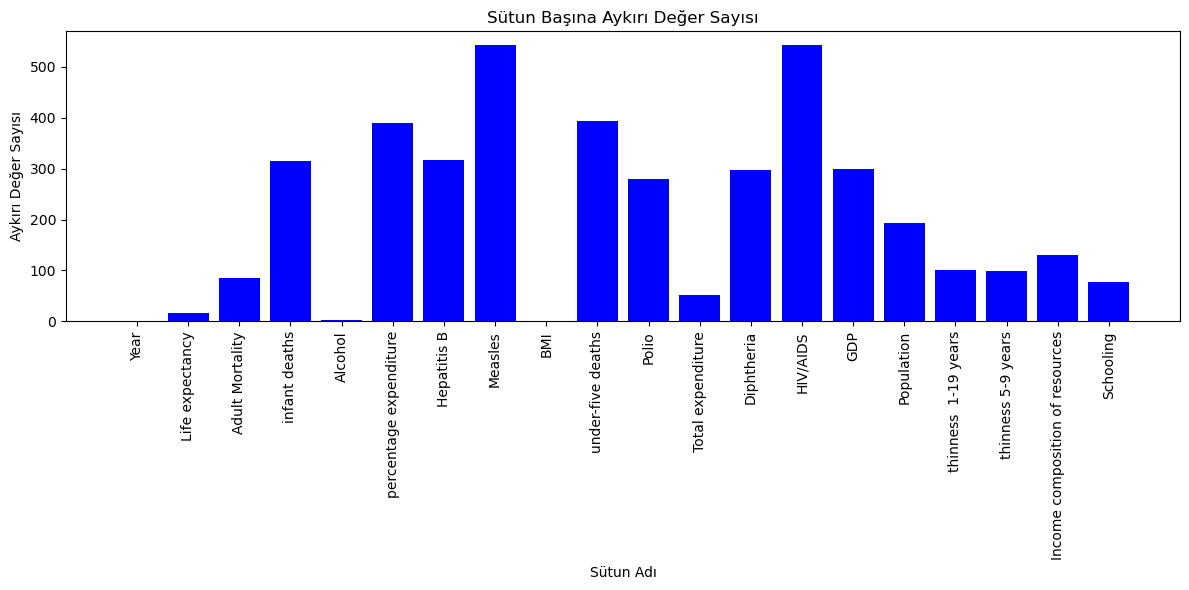

In [26]:
# Aykırı değerlerin çubuk grafikle görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.bar(columns, counts, color='blue') 
plt.title('Sütun Başına Aykırı Değer Sayısı')
plt.xlabel('Sütun Adı')
plt.ylabel('Aykırı Değer Sayısı')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

IQR yöntemi kullanarak aykırı değerleri tespit ettik ve her sütündaki aykırı değerlerin sayısı hesaplandı. Bu sayede aykırı değerlerin hangi sütunlarda daha fazla olduğunu tespit etmiş olduk.

In [27]:
def detect_outliers(data_column):
    df= pd.DataFrame(df)
    column = 'Year'
    mean_value=df[column].mean()
    Q1 = df_column.quantile(0.25)
    Q3 = df_column.quantile(0.75)
    Upper_Limit = q3 + 1.5 * Iqr
    Lower_Limit = q1 - 1.5 * Iqr  
    outliers = df_column[(df_column < Lower_Limit) | (df_column > Upper_Limit)]
    df[column]=np.where((df[column] < Lower_Limit) | (df[column]  > Upper_Limit), mean_value, df[column])
    #print(df.head())
    return outliers.tolist()

Aykırı değerleri ortalama değerler ile doldurmamızın sebebi verimizin istatiksel verilerini bozmadan aykırı değerlerden kurtulmaktır.

In [28]:
# Güncellenmiş veri setini kontrol edin
print(df.head())

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0             

# KEŞİFSEL VERİ ANALİZİ(EDA)

# 1.Veri Setinin Özet İstatistikleri

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


# 2.Dağılımların ve Desenlerin İncelenmesi

In [30]:
cat_columns = []
num_columns =[]

for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(cat_columns)
print(num_columns)

['Country', 'Status']
['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


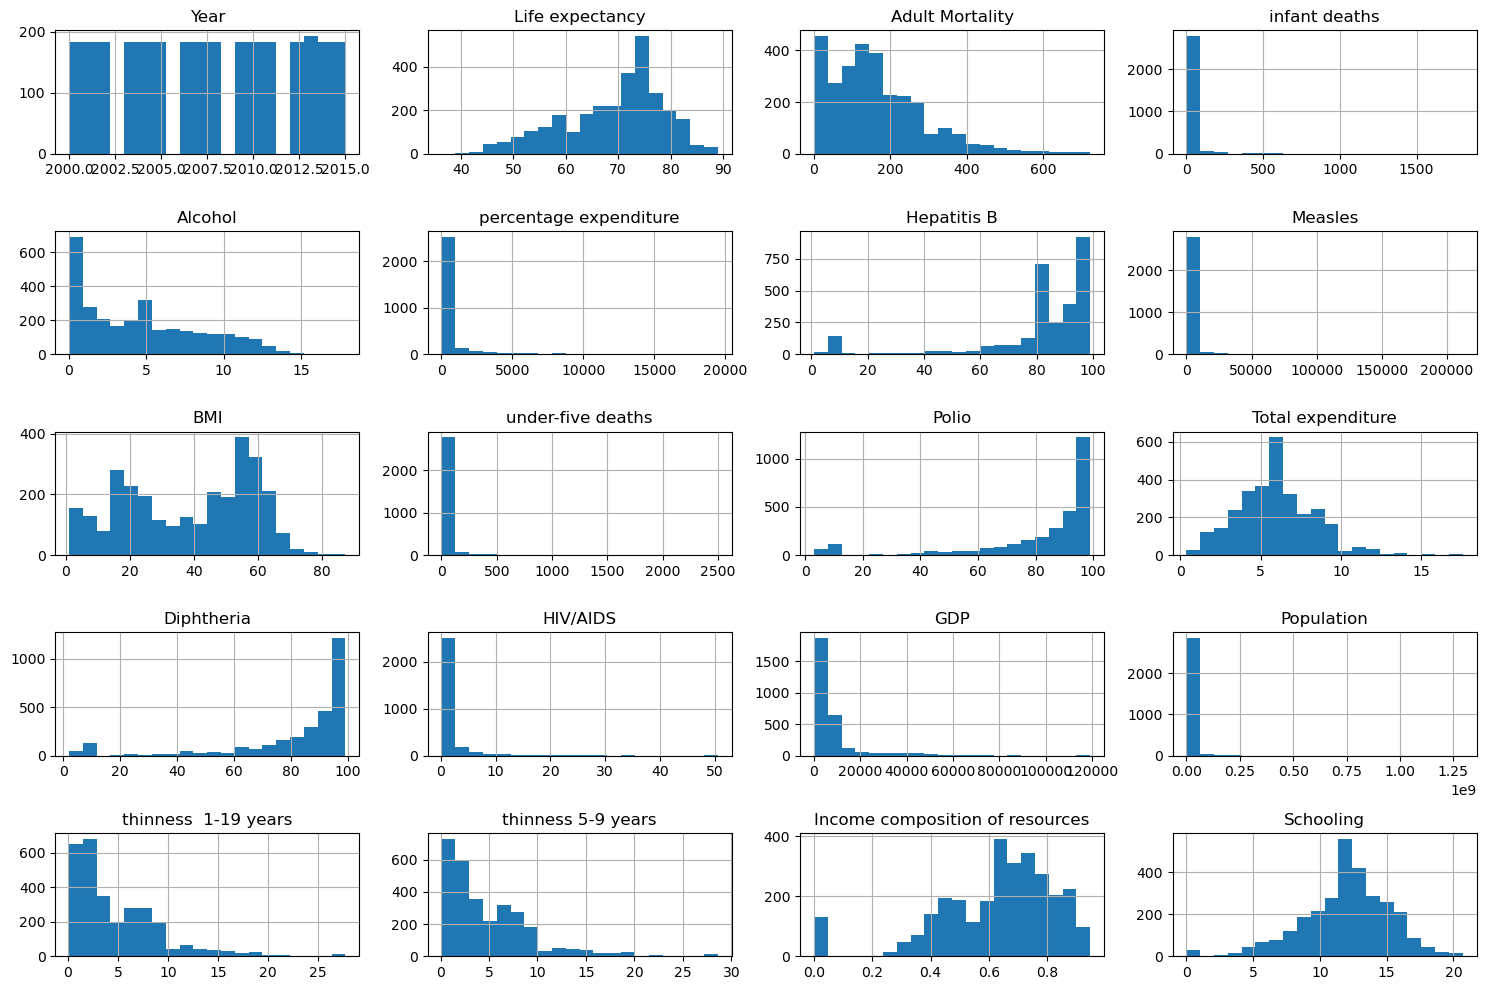

In [31]:
#Histogramlar
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

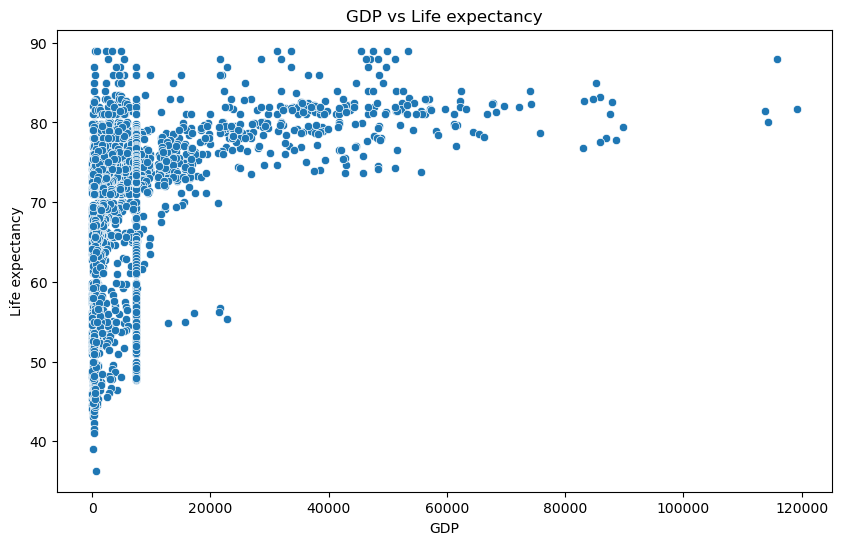

In [32]:
#Scatter plot: GDP ve Life expectancy arasındaki ilişki
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy')
plt.title('GDP vs Life expectancy')
plt.show()

GDP ile Life expectancy arasındaki ilişkinin nasıl olduğunu görmek istedik. GDP arttıkça Life expectancy artış yaşandığı gözlenmektedir.

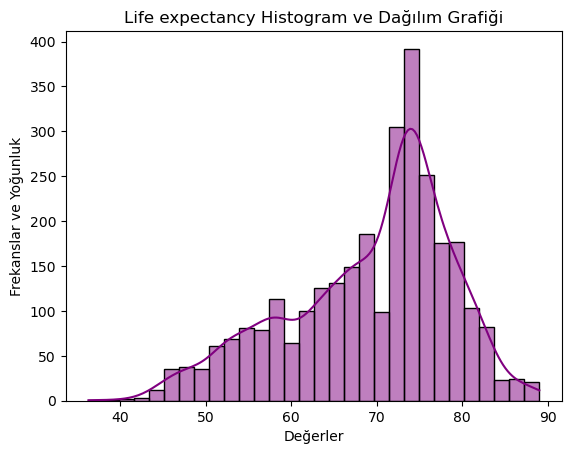

In [33]:
#Sayısal değişkenlerin histogram ve dağılım grafiği(KDE Plot)
sayisal_degisken = 'Life expectancy'

sns.histplot(df[sayisal_degisken], bins=30, kde=True, color='purple')
plt.xlabel('Değerler')
plt.ylabel('Frekanslar ve Yoğunluk')
plt.title(f'{sayisal_degisken} Histogram ve Dağılım Grafiği')
plt.show()

In [34]:
#Kategorik Değişkenlerin Frekanslarının görselleştirilmesi
Kategori ='Status'
frekanslar = df[Kategori].value_counts().reset_index()
frekanslar.columns = ['Kategori','Frekans']

print(frekanslar)

     Kategori  Frekans
0  Developing     2426
1   Developed      512


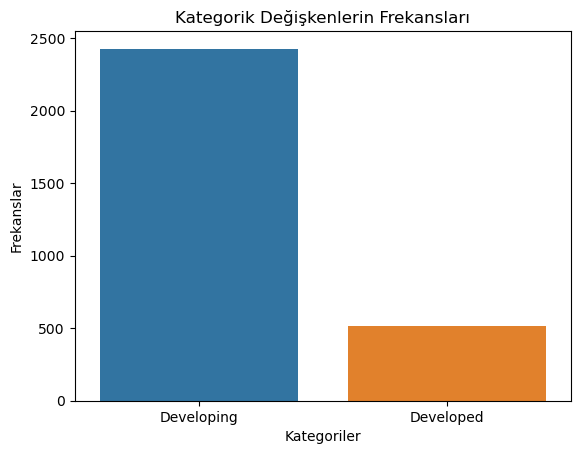

In [35]:
#Çubuk grafiği 
sns.barplot(x='Kategori', y='Frekans', data=frekanslar)
plt.xlabel('Kategoriler')
plt.ylabel('Frekanslar')
plt.title('Kategorik Değişkenlerin Frekansları')
plt.show()

In [36]:
#Status sütunun unique değerlerini görme
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [37]:
df_num = df.drop(columns = 'Country', axis=1, inplace=False)
df_num['Status'].replace(['Developing','Developed'], [0,1], inplace=True)
df_num

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


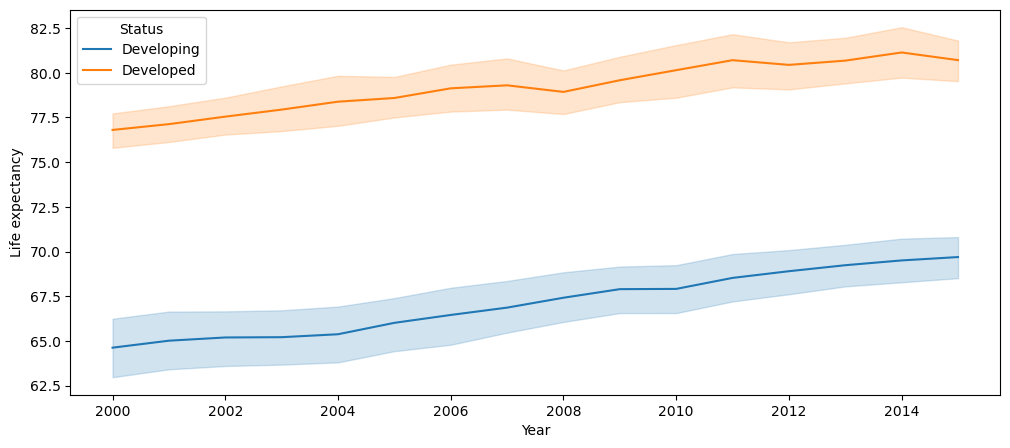

In [38]:
#Life expectancy_Ülkelerin durumuna göre

plt.figure(figsize = (12,5))
sns.lineplot(df, x = 'Year', y = 'Life expectancy', hue = 'Status')
plt.show()

2000-2015 yılları arasında gelişmekte olan ülkelere göre gelişmiş ülkelerin Life expectancy daha yüksek olduğu ve bu süre zarfında her iki statüde de Life expectancy'de artış görülmektedir.

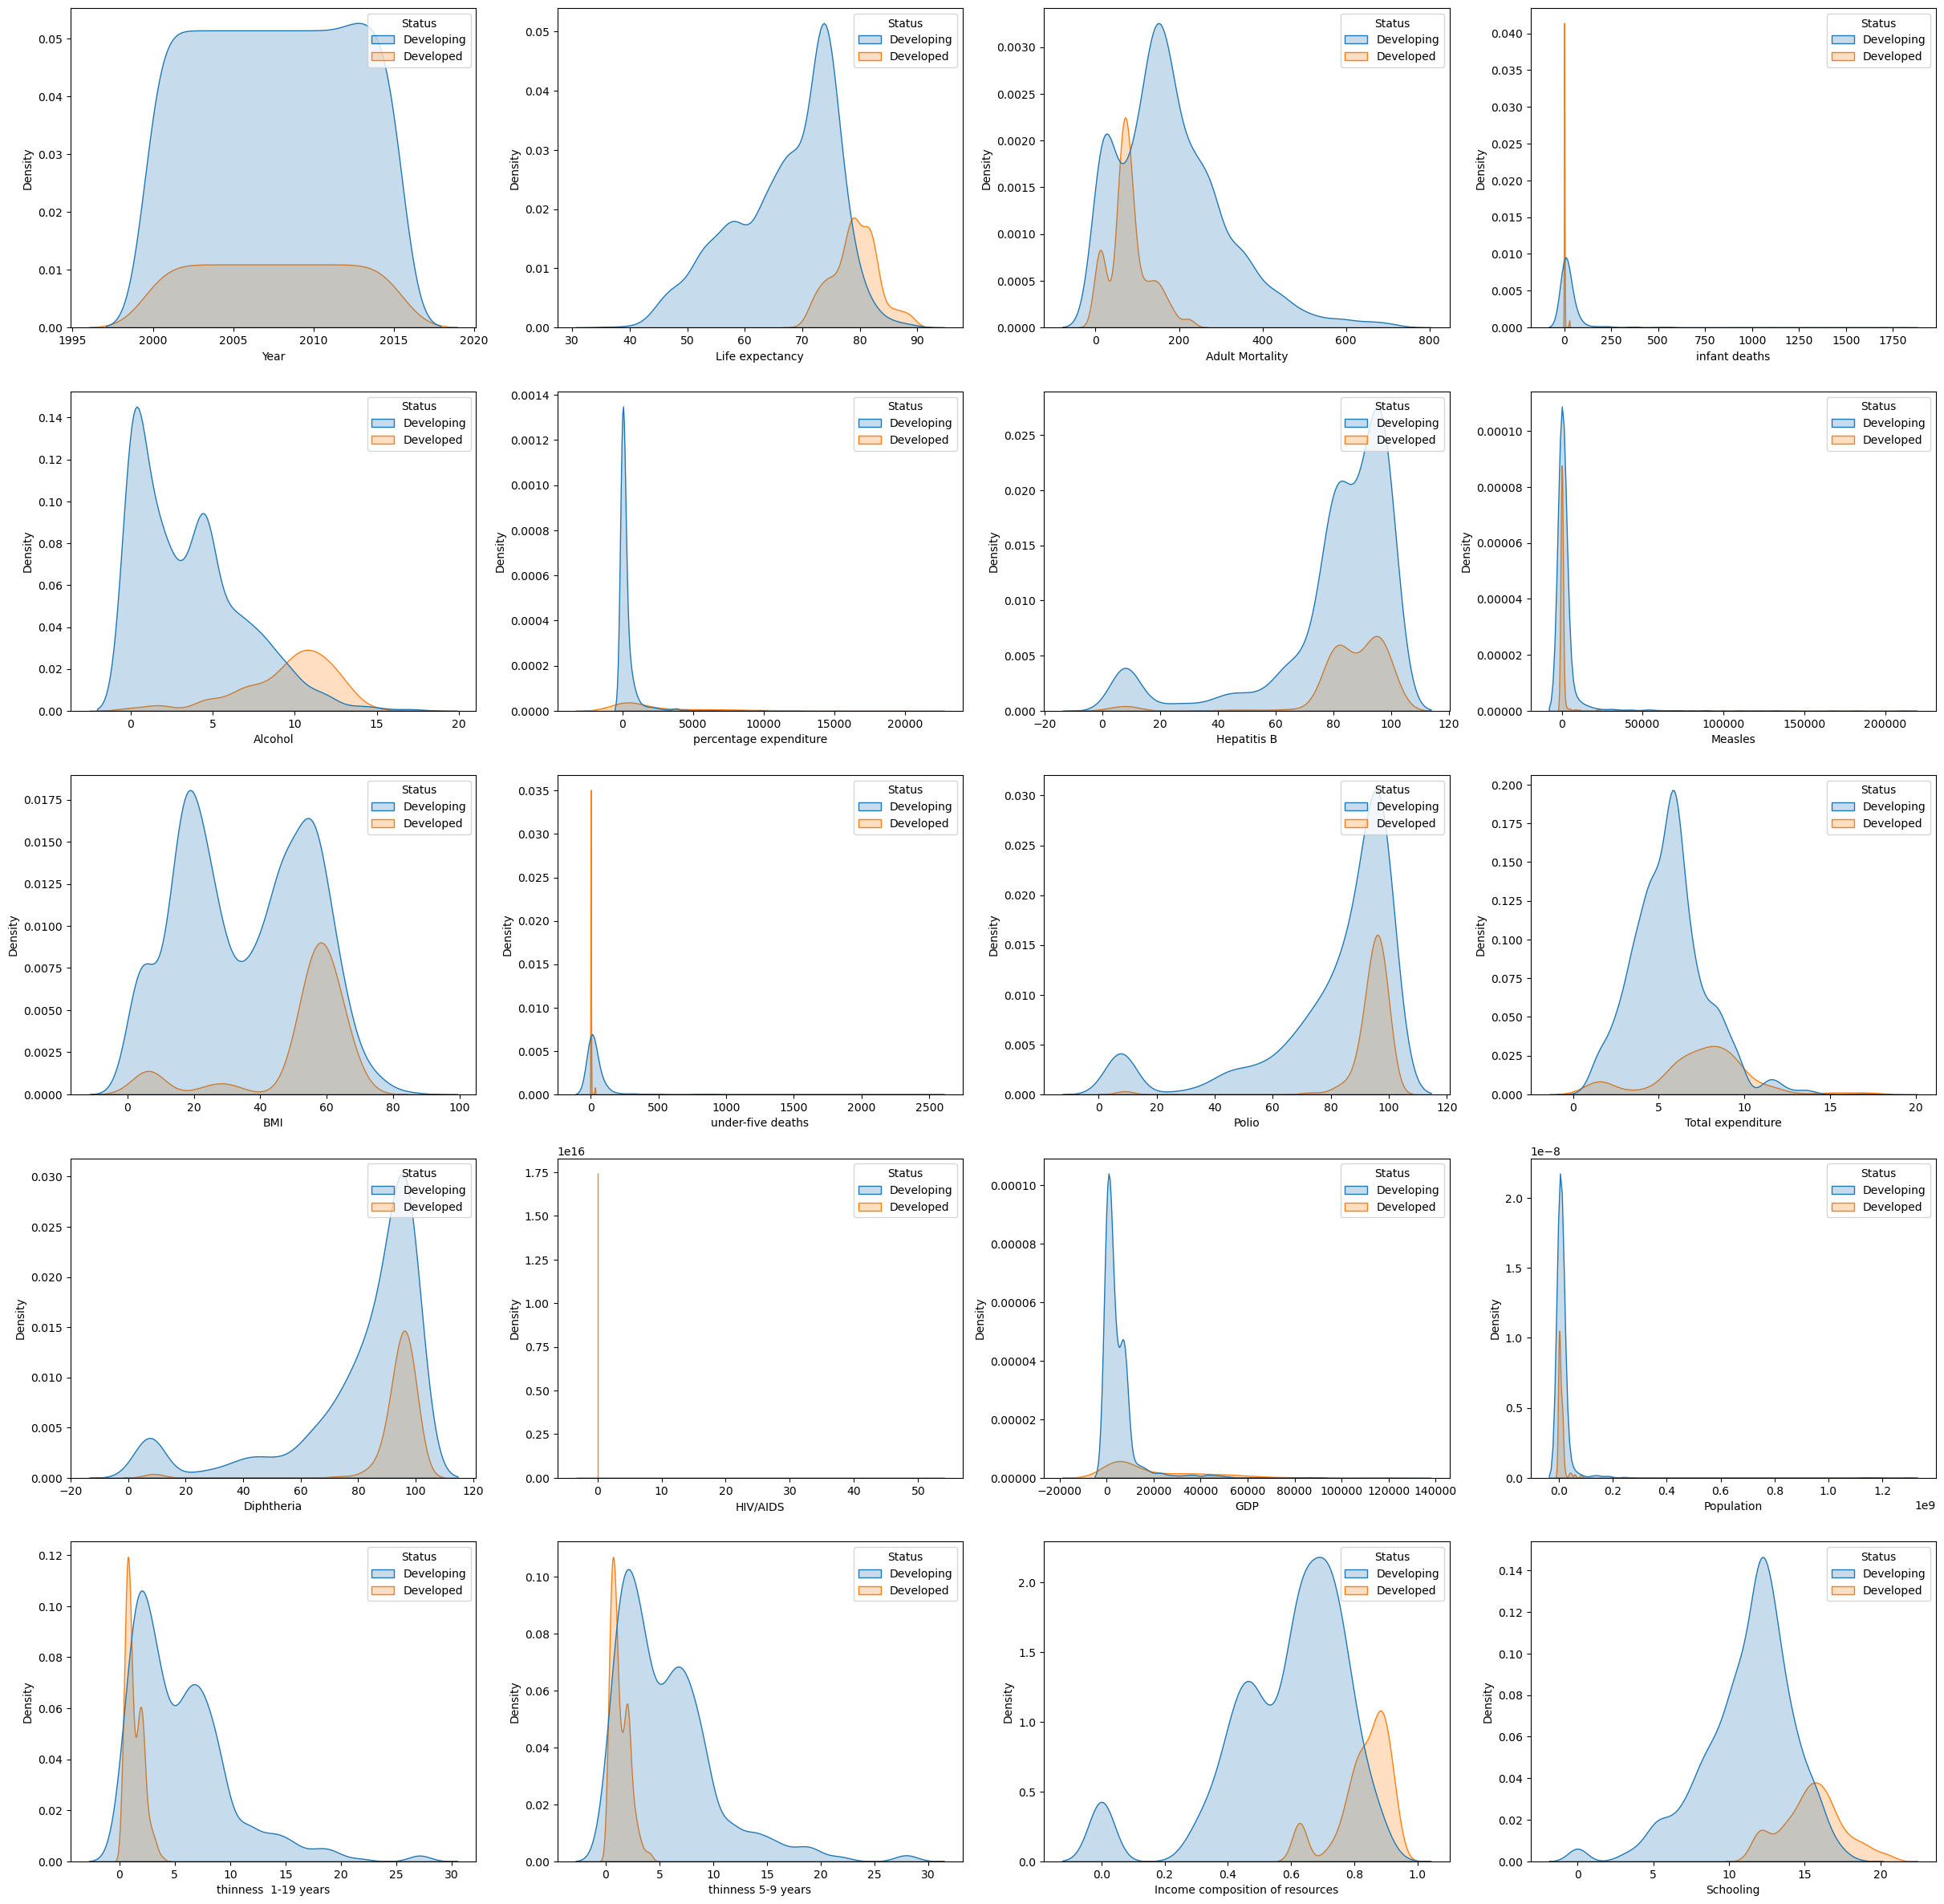

In [39]:
fig =plt.figure(figsize=(30,30))
counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col, data=df, fill=True, hue="Status")
    plt.xticks()
    counter =counter + 1

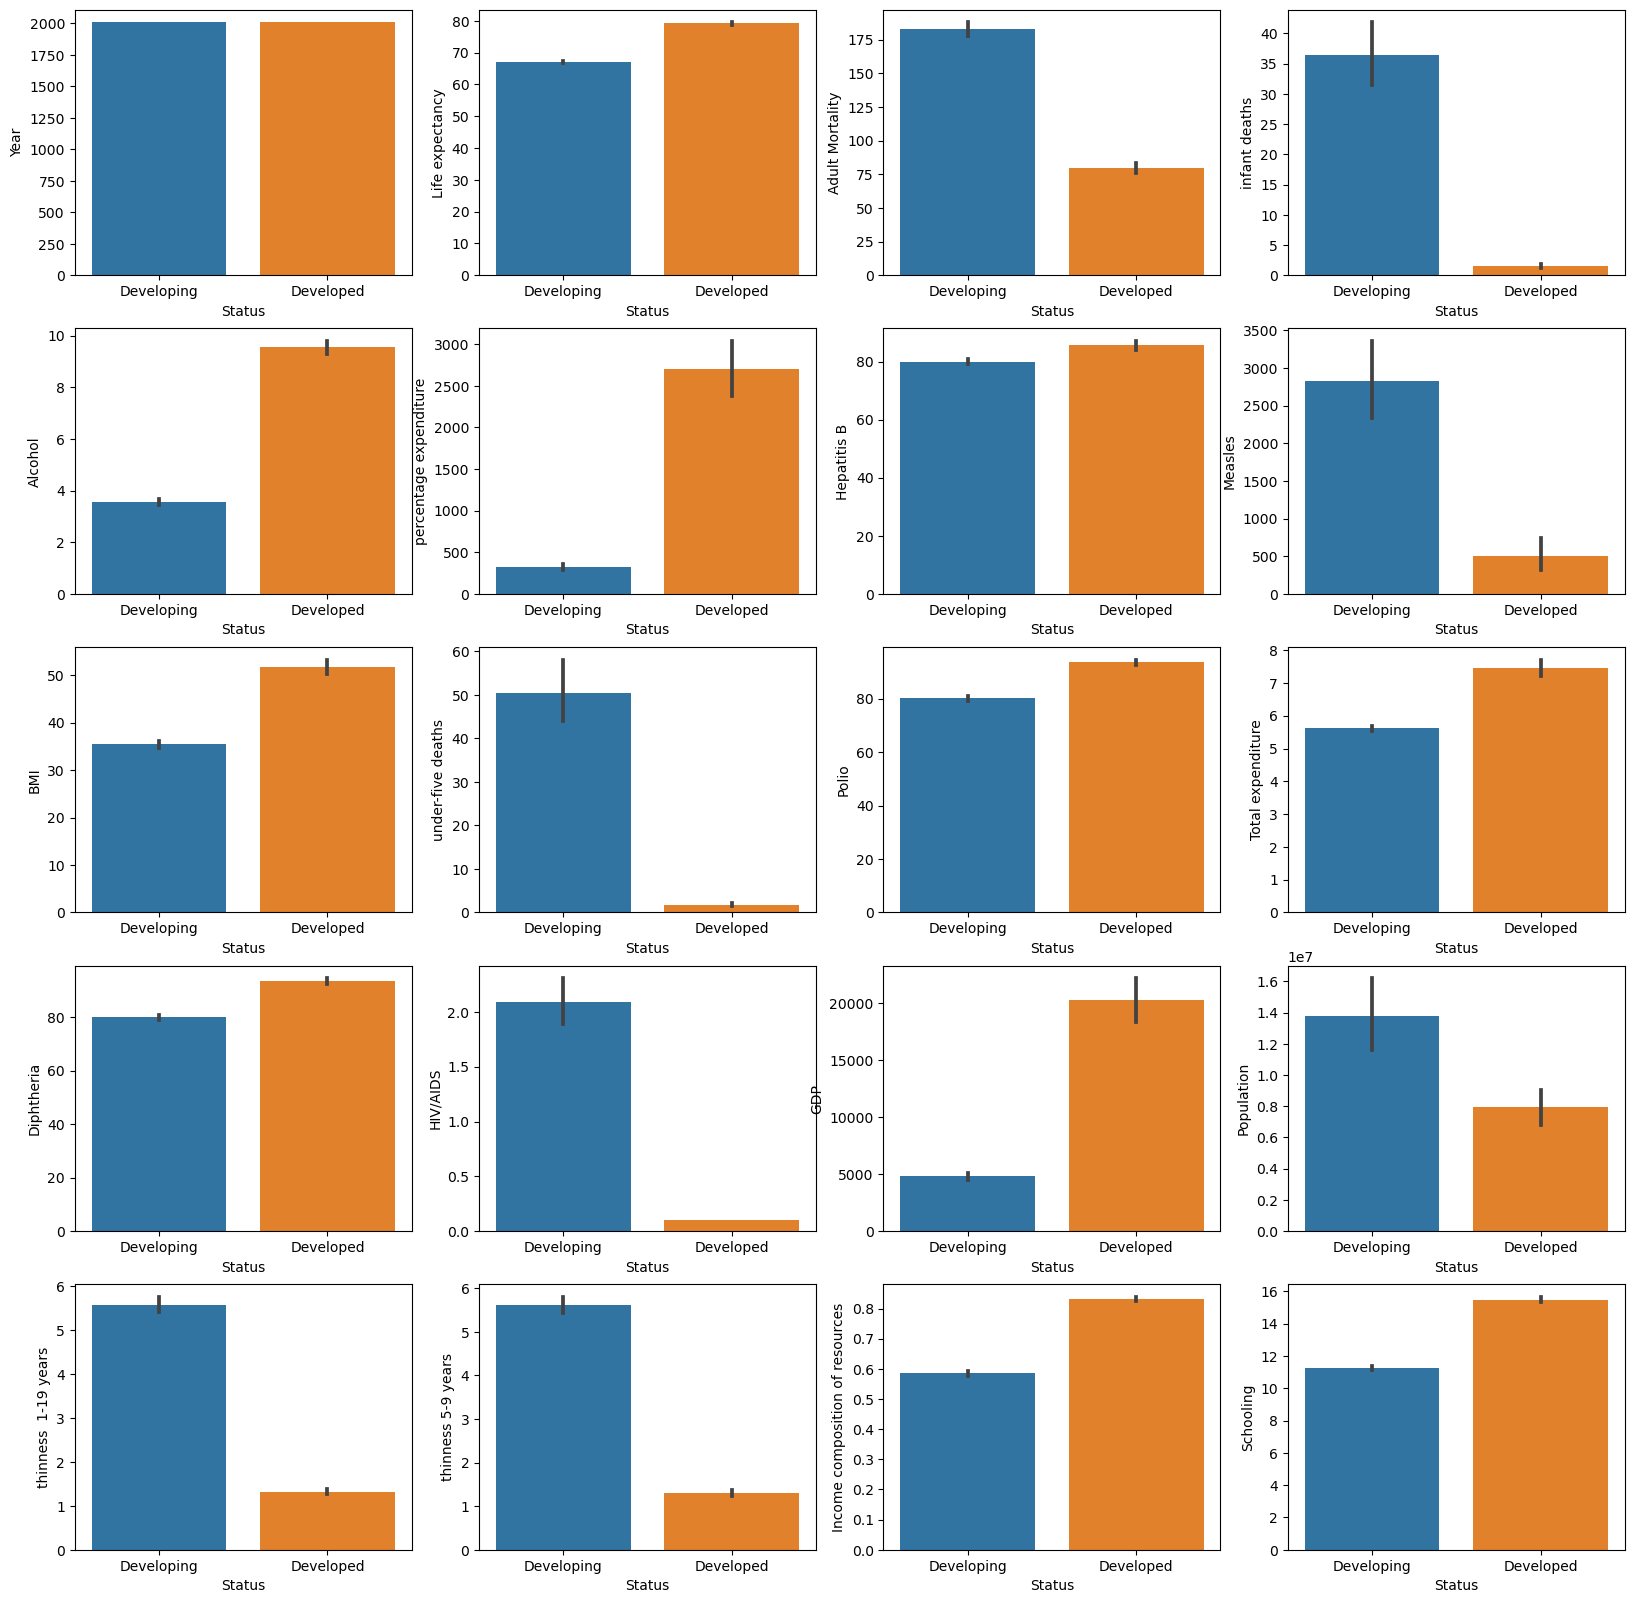

In [40]:
fig =plt.figure(figsize=(20,20))

counter = 0

for i in df.columns:
    if (df[i].dtype != 'object'):
        try:
            sub = fig.add_subplot(5,4,counter+1)
        except ValueError:
            break
        g = sns.barplot(y=i, data=df, x="Status")
        plt.xticks()
        counter =counter + 1

Grafiklerden görüldüğü üzere ülkelerin statülerinin ortalama yaşama beklentisi üzerindeki etkisi büyük. İki statü arasındaki farkın en yoğun olduğu alanlar; infant deaths, under-five deaths, percentage expenditure (ülkelerin yıllık kişi bazında yaptığı gayri safi yurtiçi hasılanın oranı), HIV/AIDS ve measles'dir(Her 1000 kişiye düşen kızamık vaka sayısı).

# 3.Korelasyonların İncelenmesi

In [41]:
#Dağılım grafiği ile aralarındaki ilişki_correlation
df.select_dtypes(include="number").corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes == object:
        df[col]= le.fit_transform(df[col])
print(df)

      Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0           0  2015       1             65.0            263.0             62   
1           0  2014       1             59.9            271.0             64   
2           0  2013       1             59.9            268.0             66   
3           0  2012       1             59.5            272.0             69   
4           0  2011       1             59.2            275.0             71   
...       ...   ...     ...              ...              ...            ...   
2933      192  2004       1             44.3            723.0             27   
2934      192  2003       1             44.5            715.0             26   
2935      192  2002       1             44.8             73.0             25   
2936      192  2001       1             45.3            686.0             25   
2937      192  2000       1             46.0            665.0             24   

      Alcohol  percentage expenditure  

<Figure size 640x480 with 0 Axes>

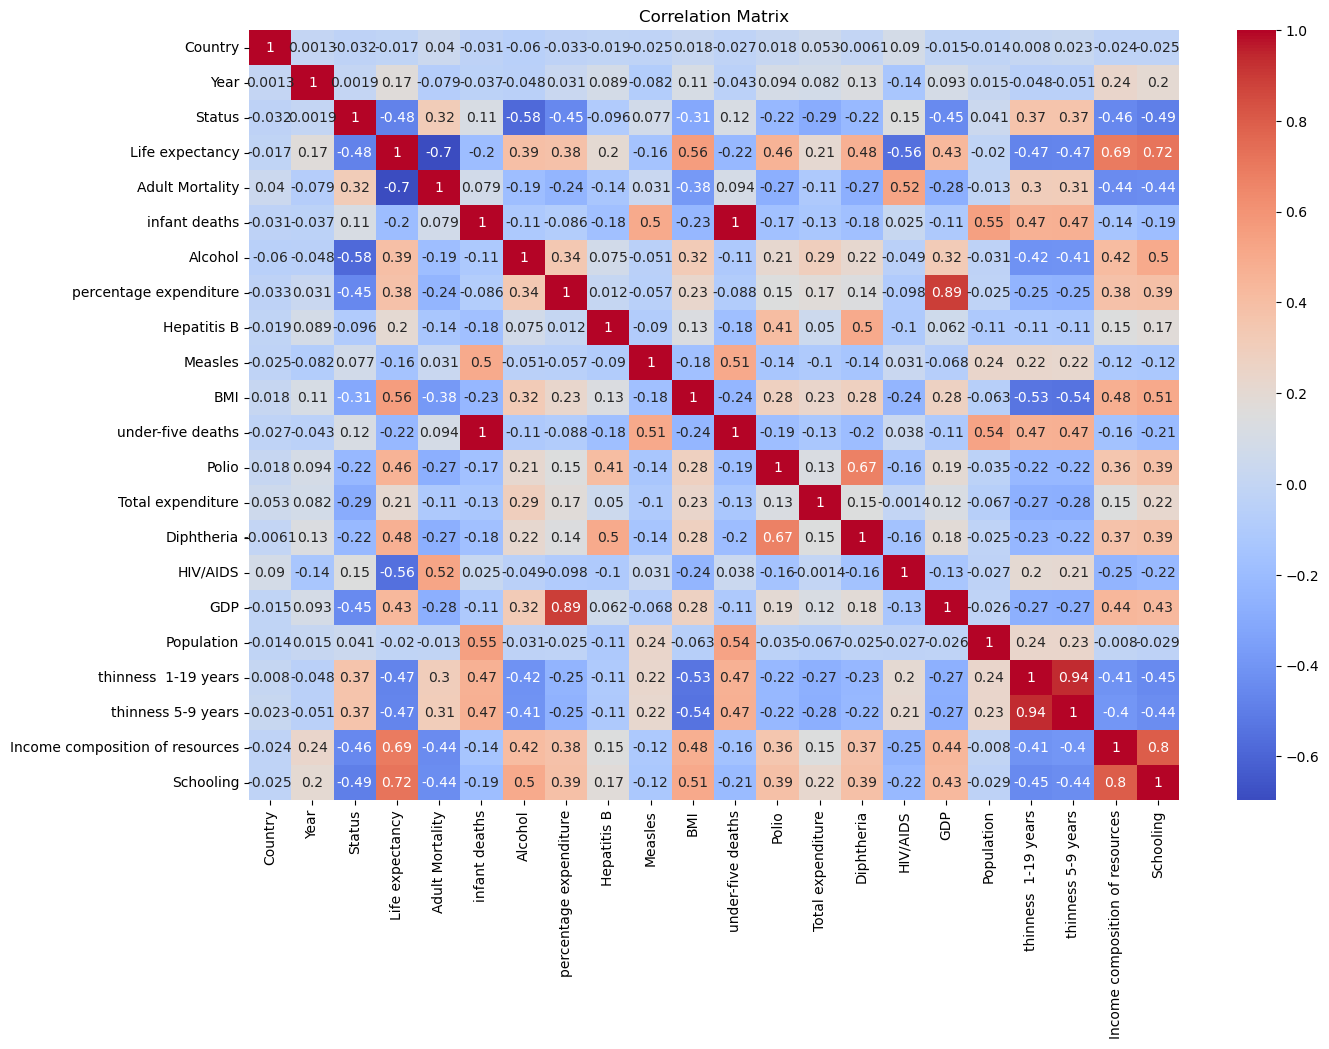

In [45]:
corr = df.corr()
plt.tight_layout()
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

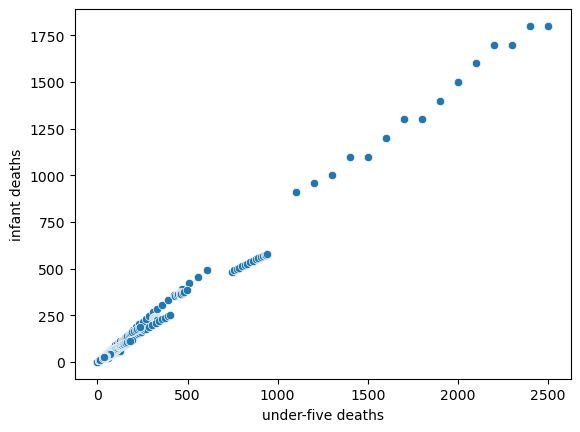

In [46]:
# Scatter plotları
sns.scatterplot(x='under-five deaths', y= 'infant deaths', data=df)
plt.show()

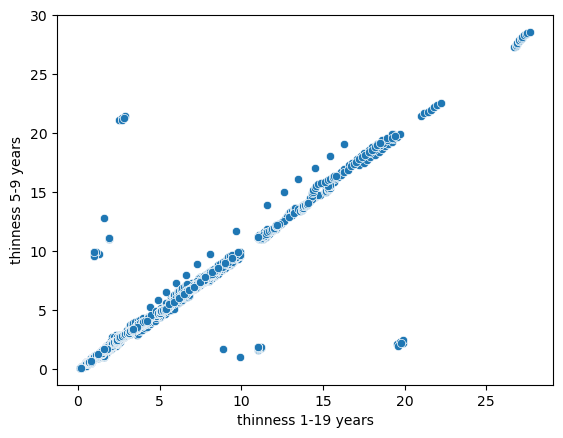

In [47]:
sns.scatterplot(x=df['thinness  1-19 years'], y=df['thinness 5-9 years'])
plt.xlabel('thinness 1-19 years')
plt.ylabel('thinness 5-9 years')                                                      
plt.show()

In [48]:
df=df.drop(columns=["thinness 5-9 years", "infant deaths"])

* under-five deaths ve infant deaths arasında yüksek bir korelasyona(1)
* thinness  1-19 years ve thinness 5-9 years arasında 0.94 korelasyon
olması itibariyle analizin dışında bırakıldı.

# 4) Kategorik ve Sayısal değişkenlerin  belirlenmesi ve dönüştürülmesi

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
#Kategorik Sütunların belirlenmesi ve dönüştürülmesi

categorical_columns = df.select_dtypes(include = ['object']).columns

In [51]:
#Kategorik sütunlarda eksik değerin mod ile doldurulması

for column in df.select_dtypes(include = ['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [52]:
# Kategorik Verilerin Dönüştürülmesi
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
print("Dönüştürülmüş Kategorik Veriler:")
print(df[categorical_columns].head())

Dönüştürülmüş Kategorik Veriler:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [53]:
#Sayısal Sütunları belirleme
numeric_columns = df.select_dtypes(include = ['float64', 'int64']).columns

In [54]:
#Sayısal verilerin eksik değerelerini kontrol edilmesi ve doldurulması

for col in numeric_columns:
    if df[col].isnull().sum()> 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Ölçeklendirilmiş Sayısal Veriler:")
print(df_scaled.head())

Ölçeklendirilmiş Sayısal Veriler:
   Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0        0  2015       1             65.0            263.0     0.01   
1        0  2014       1             59.9            271.0     0.01   
2        0  2013       1             59.9            268.0     0.01   
3        0  2012       1             59.5            272.0     0.01   
4        0  2011       1             59.2            275.0     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    

# MODELLEME

# Veri kümesini bölme (Train, Validation, Test Split)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

In [58]:
#Verilerin eğitim ve test data setine bölünmesi(%80 Eğitim, %20 test)
X_train, X_pred, y_train, y_pred = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#Geçici seti doğrulama ve test setlerine ayırma işlemi(%50 doğrulama, %50 test)
X_val, X_test, y_val, y_test = train_test_split(X_pred, y_pred, test_size=0.5, random_state=42)

print("Eğitim seti boyutu:", X_train.shape)
print("Doğrulama seti boyutu:", X_val.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (2350, 19)
Doğrulama seti boyutu: (294, 19)
Test seti boyutu: (294, 19)


İlk olarak, veri setinizi eğitim ve geçici set olarak ayırıyorsunuz (%80 eğitim, %20 geçici). Ardından, geçici seti doğrulama ve test setlerine ayırıyorsunuz (%50 doğrulama, %50 test). Bu, orijinal veri setinin %10'unun doğrulama, %10'unun test seti olmasını sağlar.

# Model Seçimi ve Eğitim

# 1.Model Seçimi

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Veriyi Ölçeklendirme

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
X = df_scaled.drop(columns=['Life expectancy'])
y = df_scaled['Life expectancy']

In [64]:
scaler = StandardScaler()

#Eğitim setinin ölçeklendirilmesi
X_train_scaled = scaler.fit_transform(X_train)

#Doğrulama setinin ölçeklendirilmesi
X_val_scaled = scaler.transform(X_val)

#Test setinin ölçeklendirilmesi
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_df = pd.DataFrame(X_test)
X_train_df.head()

,Country,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
231,14,0.104330,1,0.477220,2.571020,-0.118962,0.755415,-0.211036,0.997715,-0.255805,0.661714,4.921306e-03,0.620912,-0.323445,-0.084280,-0.059944,-0.623540,0.622355,9.520138e-01
322,20,1.188210,1,-1.255824,-0.123317,-0.333391,0.445447,-0.211036,0.822050,-0.262038,0.190585,1.467503e+00,0.282446,-0.323445,-0.528932,-0.230240,-0.555262,0.524692,6.762638e-01
2601,171,1.621762,1,-0.103148,0.000000,-0.371433,-0.218769,-0.207285,-1.050038,-0.249571,-0.323374,3.700951e-16,-0.267561,-0.323445,-0.481279,-0.234701,-0.669059,-0.119887,1.554027e-01
718,45,-1.196326,1,0.017762,-0.388919,-0.371433,0.000000,-0.211036,-0.608365,-0.149832,0.704544,3.700951e-16,-0.775260,-0.323445,0.000000,0.000000,0.241317,0.000000,5.442560e-16
759,48,0.321106,1,0.920557,-1.050372,-0.282245,0.356885,-0.206849,-0.332320,-0.249571,0.276245,1.013311e+00,0.282446,0.287162,-0.474283,-0.235469,0.195798,-0.935377,-2.050597e+00


In [66]:
from sklearn.preprocessing import StandardScaler
categorical_columns = []
numeric_columns =[]

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numeric_columns.append(col)
print(categorical_columns)
print(numeric_columns)

[]
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


# 2.Modelin Eğitilmesi

In [67]:
#Modelleri oluşturma
models = {
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(), 
    'Linear Regression': LinearRegression(), 
    'Extra Trees': ExtraTreesRegressor()}

In [68]:
#Modelleri Eğitme ve değerlendirme 
result ={}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    result[model_name] = {'MSE': mse, 'R^2' : r2, 'MAE' : mae}
    print(f'{model} \n- Mean Squared Error: {mse}, R^2 Score: {r2}, Mean Absolute Error: {mae}')

DecisionTreeRegressor() 
- Mean Squared Error: 0.07080248897820143, R^2 Score: 0.929769236785411, Mean Absolute Error: 0.16428001608529944
RandomForestRegressor() 
- Mean Squared Error: 0.034476906862031816, R^2 Score: 0.9658014920500285, Mean Absolute Error: 0.12067816681977697
GradientBoostingRegressor() 
- Mean Squared Error: 0.04757727231489272, R^2 Score: 0.9528069112461288, Mean Absolute Error: 0.15970438896420286
LinearRegression() 
- Mean Squared Error: 0.17280708876258571, R^2 Score: 0.8285883178990482, Mean Absolute Error: 0.3045527919635013
ExtraTreesRegressor() 
- Mean Squared Error: 0.025134688696144044, R^2 Score: 0.9750682723762045, Mean Absolute Error: 0.09833730871777947


                        MSE       R^2       MAE
Decision Tree      0.070802  0.929769  0.164280
Random Forest      0.034477  0.965801  0.120678
Gradient Boosting  0.047577  0.952807  0.159704
Linear Regression  0.172807  0.828588  0.304553
Extra Trees        0.025135  0.975068  0.098337


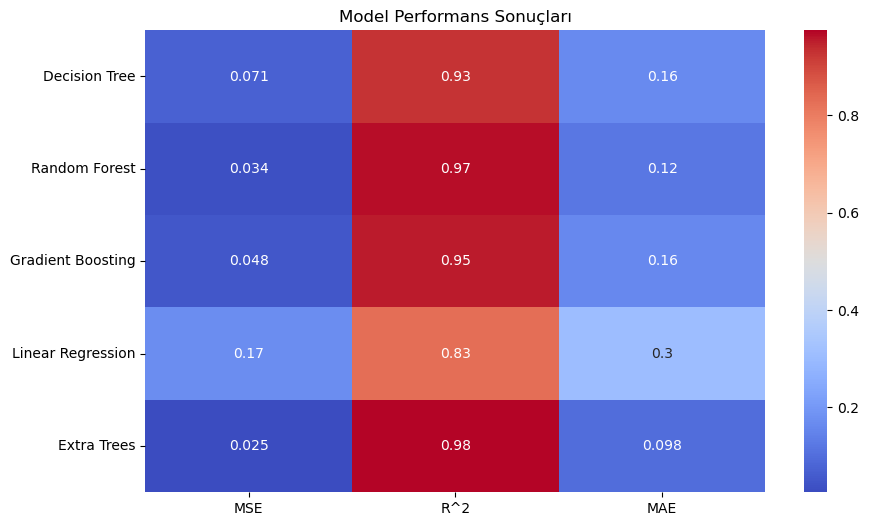

In [69]:
#Sonuçların Tablo haline getirilmesi ve gösterilmesi
results_df = pd.DataFrame(result).T
print(results_df)

plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, cmap='coolwarm')
plt.title('Model Performans Sonuçları')
plt.show()

# 3.Feature Importance Hesaplama

In [71]:
feature_importances = model.feature_importances_

In [72]:
features =X.columns

In [73]:
feature_importance_df =pd.DataFrame({'Feature':features, 'Importance':feature_importances})

In [74]:
#Önem sırasına göre sıralama
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                            Feature  Importance
3                   Adult Mortality    0.276039
17  Income composition of resources    0.243969
13                         HIV/AIDS    0.112000
18                        Schooling    0.110493
8                               BMI    0.058311
2                            Status    0.055560
16             thinness  1-19 years    0.037817
10                            Polio    0.020486
12                       Diphtheria    0.016834
9                 under-five deaths    0.016663
4                           Alcohol    0.008969
0                           Country    0.007628
1                              Year    0.007510
14                              GDP    0.006172
11                Total expenditure    0.005728
5            percentage expenditure    0.004960
6                       Hepatitis B    0.004791
15                       Population    0.003449
7                           Measles    0.002619


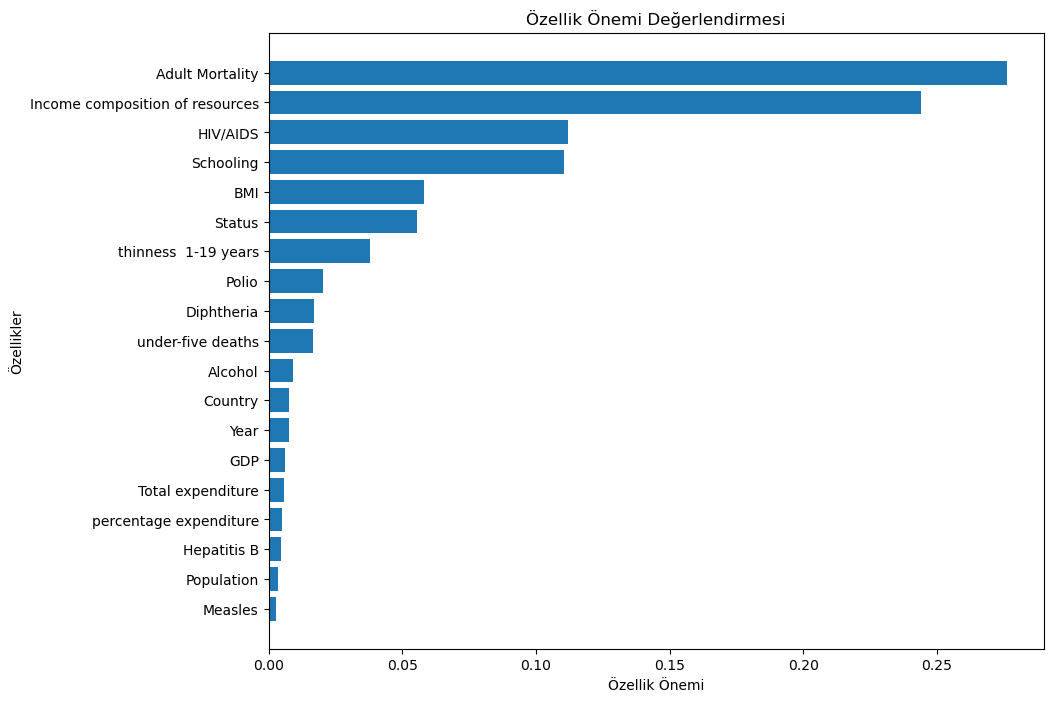

In [75]:
#Özellik önemini görselleştirme
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Özellik Önemi')
plt.ylabel('Özellikler')
plt.title('Özellik Önemi Değerlendirmesi')
plt.gca().invert_yaxis()
plt.show()

# Modelin Değerlendirilmesi

In [76]:
#Dogrulama seti ile tahmin yapılması
y_pred_val =model.predict(X_val)

#Modelin doğruluk skorunu hesaplama
mae_val =mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f'Doğrulama seti MAE: {mae_val}, MSE: {mse_val}, R2: {r2_val}')


Doğrulama seti MAE: 0.08272792107757755, MSE: 0.01950880876873392, R2: 0.9785442311522822


In [77]:
#Test seti ile tahmin yapma
y_pred_test = model.predict(X_test)

#Modelin doğruluk skorunu hesaplama
mae_test =mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Test seti MAE: {mae_val}, MSE: {mse_val}, R2: {r2_test}')

Test seti MAE: 0.08272792107757755, MSE: 0.01950880876873392, R2: 0.9750682723762045


# Modelin İyileştirilmesi

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [79]:
#Random Forest modeli_Hiperparametreler
rf_model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth':[10,20,30]}

In [80]:
#GridSearchCv ile en iyi hiperparametrelerin bulunması

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#En iyi modelin ve hiperparametrelerin alınması
best_model = grid_search.best_estimator_
print("En iyi hiperparametreler:",grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
En iyi hiperparametreler: {'max_depth': 30, 'n_estimators': 300}


In [81]:
# En iyi model ile doğrulama seti üzerinde tahmin yapma

y_pred_val_best = best_model.predict(X_val)
mae_val_best = mean_absolute_error(y_val, y_pred_val_best)
mse_val_best = mean_squared_error(y_val, y_pred_val_best)
r2_val_best = r2_score(y_val, y_pred_val_best)
print(f'En iyi Model Doğrulama seti MAE: {mae_val_best}, MSE: {mse_val_best}, R2: {r2_val_best}')

En iyi Model Doğrulama seti MAE: 0.10351175563392123, MSE: 0.02663048772469857, R2: 0.9707118155856421


In [82]:
# En iyi model ile Test seti üzerinde tahmin yapma

y_pred_test_best = best_model.predict(X_test)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)
print(f'En iyi Model Test seti MAE: {mae_val_best}, MSE: {mse_val_best}, R2: {r2_test_best}')


En iyi Model Test seti MAE: 0.10351175563392123, MSE: 0.02663048772469857, R2: 0.967258903779181


# Modelin Aşırı Öğrenimden Korunması

In [83]:
from sklearn.linear_model import Ridge, Lasso


In [84]:
#Ridge Regression
ridge_model =Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_val_pred = ridge_model.predict(X_val_scaled)
ridge_val_mse = mean_squared_error(y_val, ridge_val_pred)
ridge_val_mae = mean_absolute_error(y_val, ridge_val_pred)
ridge_val_r2 = r2_score(y_val, ridge_val_pred)
print("Ridge Doğrulama Hatası(MSE):",ridge_val_mse)
print("Ridge Doğrulama Hatası(MAE):",ridge_val_mae)
print("R2:",ridge_val_r2)

Ridge Doğrulama Hatası(MSE): 0.1845784962445295
Ridge Doğrulama Hatası(MAE): 0.31562652354829224
R2: 0.7970007499366658


In [85]:
# Lasso Regression
lasso_model =Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
lasso_val_pred = lasso_model.predict(X_val_scaled)
lasso_val_mse = mean_squared_error(y_val, lasso_val_pred)
lasso_val_mae = mean_absolute_error(y_val, lasso_val_pred)
lasso_val_r2 = r2_score(y_val, lasso_val_pred)
print("Lasso Doğrulama Hatası(MSE):",lasso_val_mse)
print("Lasso Doğrulama Hatası(MAE):",lasso_val_mae)
print("R2:",ridge_val_r2)

Lasso Doğrulama Hatası(MSE): 0.9097242090345383
Lasso Doğrulama Hatası(MAE): 0.7907639985418269
R2: 0.7970007499366658


# Sonuçların Raporlanması

Analiz aşamasında en fazla eksik değere sahip olan sütunlar Hepatitis B, Population, GDP olduğunu gözlemlendi. Eksik değerler mean ile dolduruldu. Aykırı değerleri ise IQR yöntemi kullanılarak tespit edildi ve her sütündaki aykırı değerlerin sayısı hesaplandı. Aykırı değerler, veri setinin istatiksel değerleri en az şekilde etkileyecek olan ortalama değerler ile dolduruldu.

Sonuç olarak görüldü ki
>•	Kişi başına düşen Gayri Safi Yurtiçi Hasıla  arttıkça Life expectancy'de artış görüldü,
>	Gelişmiş olan ülkelerin nüfusun yoğunluğunun daha az ve ortalama yaşam beklentisinin daha yüksek olduğu, nüfusun yoğun olduğu gelişmekte olan ülkelerde yaşam beklentisi daha düşük olma eğilimindedir.
>•	Yaşam beklentisi ile 15-60 yaş arası ölüm oranı, 1000 kişi başına bebek ölümü sayısı, 1000 kişi başına bildirilen kızamık vaka sayısı, HIV/AIDS, ülkelerin nüfusları ile negatif ilişkide olduğu görüldü. Kaynakların gelir bileşimi açısından insani gelişme endeksi, yıl içinde okullaşma sayısı, kişi başına düşen gayri safi yurtiçi hasıla, sağlık harcamalarının toplam ülke içi harcamalarına oranı, 15 yaş üzeri alkol tüketimi (litre bazında) ise pozitif yönlü bir ilişki gözlemlendi.
>•	Yaşam beklentisi ile Hepatitis B, Diphtheria hastalıkları arasında az da olsa pozitif yönde bir ilişki gözlemlendi.


Modellediğimiz 5 modelin sonucunda gördüğümüz üzere en yüksek sonuç veren 3 modeller;
>Extra Trees, 
>Random Forest,
>Gradient Boosting modelleridir.
